# ssha plots for tsunami simulations


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## DO NOT CHANGE - combining the output .txt files after running samoa with points
import glob,os

used_cols=["x","y","time","h","b"]
X_ind=0
Y_ind=1
TIME_ind=2
H_ind=3
B_ind=4

def combineProbeOutput(filesuffix):
    
    files = glob.glob(filesuffix)
    df=pd.read_csv(files[0], header=0, delimiter=',', skipinitialspace=True, usecols=["x","y","time","h","b"])
    for file in files[0:]:
        df = df.append(pd.read_csv(file,header=0,delimiter=',',skipinitialspace=True))
    return df[["x","y","time","h","b"]]

In [3]:
## checking data format from single txt file
path_complex_east = r'/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_complex_east_M6.68_points/flash_20210407_235_d18_cou.5000000000000_dry.0010197671363_pointoutput_99.txt'
data_test = pd.read_csv(path_complex_east)
data_test.head()

,x,y,z,p(1),p(2),h,b,dist_to_cell_center,time
0,664600.0,7329000.0,0.0,-0.138865,-0.082556,5.555731,-5.577474,0.000702,990.0
1,664500.0,7329200.0,0.0,0.037254,-0.008244,7.308373,-7.311189,0.000665,990.0
2,664100.0,7328700.0,0.0,0.273956,-0.188824,12.931812,-12.939581,0.001369,990.0
3,614501.0,7318500.0,0.0,0.006331,0.024507,12.085735,-12.082755,0.000192,990.0
4,614301.0,7318501.0,0.0,-0.020947,0.018118,13.382472,-13.377760,0.000395,990.0


In [4]:
## combine your output and sort by time - adjust path below
# c = complex
# s = simple
# E = East
# M = Middle
# W = West
data_cE = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_complex_east_M6.68_points/*pointoutput*.txt")
data_cE.sort_values(['time'], inplace=True)

data_cM = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_complex_middle_M7.07_points/*pointoutput*.txt")
data_cM.sort_values(['time'], inplace=True)

data_cW = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_complex_west_M6.74_points/*pointoutput*.txt")
data_cW.sort_values(['time'], inplace=True)

data_sE = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_simple_east_M7.34_points/*pointoutput*.txt")
data_sE.sort_values(['time'], inplace=True)

data_sM = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_simple_middle_M7.33_points/*pointoutput*.txt")
data_sM.sort_values(['time'], inplace=True)

data_sW = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_simple_west_M7.34_points/*pointoutput*.txt")
data_sW.sort_values(['time'], inplace=True)

In [5]:
## OLD APPROACH 
#compute sea surface height (deviation from mean sea level)
WATER_LEVEL_ind=5
SSHA_ind=6

def addData(df):
    df['waterlevel']=df['h']+df['b']
    df['ssha']=df.apply(lambda row: row['waterlevel'] if row['b'] <= 0.000 else row["h"],axis=1)
    return df

In [6]:
# NEW EQUATION FROM LEO
def appendSSHA(df):
    #df = df.sort_values(by=["time","y","x"])
    df.loc[:,"ssha"] = df.loc[:,"h"] + df.loc[:,"b"] 
    df.loc[df.loc[:,"b"] > 0,"ssha"] = df.loc[:,"h"]
    df['ssha'] = df['ssha']*100 # conversion from [m] to [cm]
    df["time"] = df.time/60 # conversion from [s] to [min]
    # necassary to convert from float to int to avoid errors later on
    df['x'] = df['x'].astype(int)
    df['y'] = df['y'].astype(int)
    return df

In [7]:
data_cE = appendSSHA(data_cE)
data_cM = appendSSHA(data_cM)
data_cW = appendSSHA(data_cW)
data_sE = appendSSHA(data_sE)
data_sM = appendSSHA(data_sM)
data_sW = appendSSHA(data_sW)

In [8]:
column_values = data_cE[["x"]].values

unique_values =  np.unique(column_values)
print(unique_values)
print(len(unique_values))

[595000 595100 595610 596010 608000 608100 608420 608620 613300 614300
 614301 614501 631700 632000 632200 632500 632700 632800 633500 664100
 664500 664600]
22


In [9]:
column_values = data_cE[["y"]].values

unique_values =  np.unique(column_values)
print(unique_values)
print(len(unique_values))

[7289600 7289601 7292000 7292100 7292200 7318400 7318500 7318501 7328700
 7329000 7329200 7332100 7332300 7333020 7333420 7338300 7338400 7341010
 7342010 7381000 7381600]
21


###### note for myself
Total stations: 22

x 	y 	time 	h 	b 	waterlevel 	ssha

    Sig
595000 	7338300 	0.0 	4.770116 	-3.219845 	155.027144 	1.550271  --> -  
595100 	7338400 	0.0 	8.291017 	-7.758359 	53.265737 	0.532657  --> -  
595610 	7341010 	0.0 	27.636965 	-27.636965 	0.000000 	0.000000  
**596010 	7342010 	0.0 	22.827670 	-22.827670 	0.000000 	0.000000**  

    Olaf  
608000 	7332100 	0.0 	9.009866 	-5.012450 	399.741543 	3.997415  --> -  
**608100 	7332300 	0.0 	16.483257 	-16.483257 	0.000000 	0.000000**    
608420 	7333020 	0.0 	30.915094 	-30.915094 	0.000000 	0.000000    
608620 	7333420 	0.0 	35.190560 	-35.190560 	0.000000 	0.000000  

    Dalvik  
**613300 	7318400 	0.0 	5.180788 	-5.180788 	0.000000 	0.000000**  
614300 	7318400 	0.0 	10.929119 	-10.929119 	0.000000 	0.000000  
614301 	7318501 	0.0 	13.371404 	-13.371404 	0.000000 	0.000000  
614501 	7318500 	0.0 	12.076183 	-12.076183 	0.000000 	0.000000  

    Akureyri  
631700 	7292000 	0.0 	22.445669 	-21.943884 	50.178460 	0.501785  --> -   
**632000 	7292100 	0.0 	37.141219 	-37.141219 	0.000000 	0.000000**  
632200 	7292200 	0.0 	45.500215 	-45.500215 	0.000000 	0.000000  
632700 	7289601 	0.0 	13.293154 	-12.042989 	125.016487 	1.250165  --> -  
632800 	7289600 	0.0 	19.242537 	-18.934226 	30.831164 	0.308312  --> -  

    Grimsey 
632500 	7381600 	0.0 	11.259042 	-11.259042 	0.000000 	0.000000  
**633500 	7381000 	0.0 	10.304572 	-10.304572 	0.000000 	0.000000**  

    Husavik  
664100 	7328700 	0.0 	12.917609 	-12.917609 	0.000000 	0.000000  
**664500 	7329200 	0.0 	7.298772 	-7.298772 	0.000000 	0.000000**  
664600 	7329000 	0.0 	5.569958 	-5.569958 	0.000000 	0.000000  


https://www.eggradients.com/shades-of-blue-color

https://www.eggradients.com/shades-of-green-color

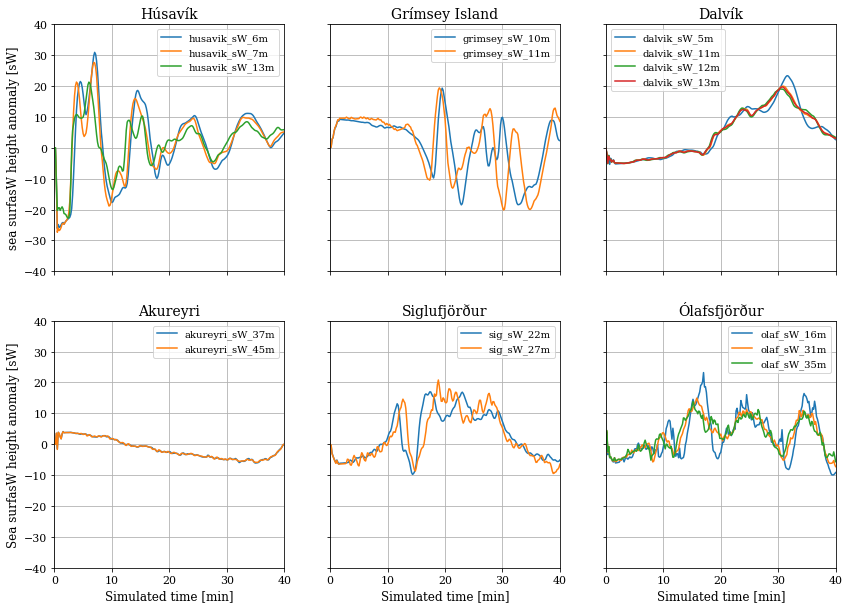

<Figure size 432x288 with 0 Axes>

In [10]:
### TESTING
sig_sW_22m = data_sW.loc[(data_sW["x"].eq(596010))] 
sig_sW_27m = data_sW.loc[(data_sW["x"].eq(595610))]

olaf_sW_16m = data_sW.loc[(data_sW["x"].eq(608100))] 
olaf_sW_31m = data_sW.loc[(data_sW["x"].eq(608420))]
olaf_sW_35m = data_sW.loc[(data_sW["x"].eq(608620))]

dalvik_sW_5m = data_sW.loc[(data_sW["x"].eq(613300))]
dalvik_sW_11m = data_sW.loc[(data_sW["x"].eq(614300))]
dalvik_sW_12m = data_sW.loc[(data_sW["x"].eq(614501))]
dalvik_sW_13m = data_sW.loc[(data_sW["x"].eq(614301))]

akureyri_sW_37m = data_sW.loc[(data_sW["x"].eq(632000))]
akureyri_sW_45m = data_sW.loc[(data_sW["x"].eq(632200))]

grimsey_sW_10m = data_sW.loc[(data_sW["x"].eq(633500))]
grimsey_sW_11m = data_sW.loc[(data_sW["x"].eq(632500))]

husavik_sW_6m = data_sW.loc[(data_sW["x"].eq(664600))] 
husavik_sW_7m = data_sW.loc[(data_sW["x"].eq(664500))]
husavik_sW_13m = data_sW.loc[(data_sW["x"].eq(664100))]

### PLOTTING
plt.rcParams["font.family"] = "serif"
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(14,10))
fig.set_figwidth(14)
ax1.set_xlim([0,40])
ax1.set_ylim([-40,40]) # simple
#ax1.set_ylim([-30,20]) # complex


ax1.plot(husavik_sW_6m.time, husavik_sW_6m.ssha, label="husavik_sW_6m")
ax1.plot(husavik_sW_7m.time, husavik_sW_7m.ssha, label="husavik_sW_7m")
ax1.plot(husavik_sW_13m.time, husavik_sW_13m.ssha, label="husavik_sW_13m")
ax1.legend()
ax1.set_ylabel("sea surfasW height anomaly [sW]", fontsize=12)
ax1.set_title("Húsavík", fontsize=14)
ax1.grid()


ax2.plot(grimsey_sW_10m.time, grimsey_sW_10m.ssha, label="grimsey_sW_10m")
ax2.plot(grimsey_sW_11m.time, grimsey_sW_11m.ssha, label="grimsey_sW_11m")
ax2.legend()
ax2.set_title("Grímsey Island", fontsize=14)
ax2.grid()


#ax3.plot(husavik.time, husavik.ssha, label="H\372sav\355k 7m")
ax3.plot(dalvik_sW_5m.time, dalvik_sW_5m.ssha, label="dalvik_sW_5m")
ax3.plot(dalvik_sW_11m.time, dalvik_sW_11m.ssha, label="dalvik_sW_11m")
ax3.plot(dalvik_sW_12m.time, dalvik_sW_12m.ssha, label="dalvik_sW_12m")
ax3.plot(dalvik_sW_13m.time, dalvik_sW_13m.ssha, label="dalvik_sW_13m")
ax3.legend()
ax3.set_title("Dalvík", fontsize=14)
ax3.grid()


ax4.plot(akureyri_sW_37m.time, akureyri_sW_37m.ssha, label="akureyri_sW_37m")
ax4.plot(akureyri_sW_45m.time, akureyri_sW_45m.ssha, label="akureyri_sW_45m")
ax4.legend()
ax4.set_ylabel("Sea surfasW height anomaly [sW]", fontsize=12)
ax4.set_xlabel("Simulated time [min]", fontsize=12)
ax4.set_title("Akureyri", fontsize=14)
ax4.grid()


ax5.plot(sig_sW_22m.time, sig_sW_22m.ssha, label="sig_sW_22m")
ax5.plot(sig_sW_27m.time, sig_sW_27m.ssha, label="sig_sW_27m")
ax5.legend()
ax5.set_xlabel("Simulated time [min]", fontsize=12)
ax5.set_title("Siglufjörður", fontsize=14)
ax5.grid()


ax6.plot(olaf_sW_16m.time, olaf_sW_16m.ssha, label="olaf_sW_16m")
ax6.plot(olaf_sW_31m.time, olaf_sW_31m.ssha, label="olaf_sW_31m")
ax6.plot(olaf_sW_35m.time, olaf_sW_35m.ssha, label="olaf_sW_35m")
ax6.legend()
ax6.set_xlabel("Simulated time [min]", fontsize=12)
ax6.set_title("Ólafsfjörður", fontsize=14)
ax6.grid()

plt.show()
plt.clf()

In [11]:
### IMPORTANT EXECUTE

#Husavik for each scenario
husavik_cE = data_cE.loc[(data_cE["x"].eq(664500) & data_cE["y"].eq(7329200))]
husavik_cM = data_cM.loc[(data_cM["x"].eq(664500) & data_cM["y"].eq(7329200))]
husavik_cW = data_cW.loc[(data_cW["x"].eq(664500) & data_cW["y"].eq(7329200))]
husavik_sE = data_sE.loc[(data_sE["x"].eq(664500) & data_sE["y"].eq(7329200))]
husavik_sM = data_sM.loc[(data_sM["x"].eq(664500) & data_sM["y"].eq(7329200))]
husavik_sW = data_sW.loc[(data_sW["x"].eq(664500) & data_sW["y"].eq(7329200))]

#Grimsey
grimsey_cE = data_cE.loc[(data_cE["x"].eq(633500) & data_cE["y"].eq(7381000))]
grimsey_cM = data_cM.loc[(data_cM["x"].eq(633500) & data_cM["y"].eq(7381000))]
grimsey_cW = data_cW.loc[(data_cW["x"].eq(633500) & data_cW["y"].eq(7381000))]
grimsey_sE = data_sE.loc[(data_sE["x"].eq(633500) & data_sE["y"].eq(7381000))]
grimsey_sM = data_sM.loc[(data_sM["x"].eq(633500) & data_sM["y"].eq(7381000))]
grimsey_sW = data_sW.loc[(data_sW["x"].eq(633500) & data_sW["y"].eq(7381000))]

#Dalvik
dalvik_cE = data_cE.loc[(data_cE["x"].eq(613300) & data_cE["y"].eq(7318400))]
dalvik_cM = data_cM.loc[(data_cM["x"].eq(613300) & data_cM["y"].eq(7318400))]
dalvik_cW = data_cW.loc[(data_cW["x"].eq(613300) & data_cW["y"].eq(7318400))]
dalvik_sE = data_sE.loc[(data_sE["x"].eq(613300) & data_sE["y"].eq(7318400))]
dalvik_sM = data_sM.loc[(data_sM["x"].eq(613300) & data_sM["y"].eq(7318400))]
dalvik_sW = data_sW.loc[(data_sW["x"].eq(613300) & data_sW["y"].eq(7318400))]

#Akureyri
akureyri_cE = data_cE.loc[(data_cE["x"].eq(632000) & data_cE["y"].eq(7292100))]
akureyri_cM = data_cM.loc[(data_cM["x"].eq(632000) & data_cM["y"].eq(7292100))]
akureyri_cW = data_cW.loc[(data_cW["x"].eq(632000) & data_cW["y"].eq(7292100))]
akureyri_sE = data_sE.loc[(data_sE["x"].eq(632000) & data_sE["y"].eq(7292100))]
akureyri_sM = data_sM.loc[(data_sM["x"].eq(632000) & data_sM["y"].eq(7292100))]
akureyri_sW = data_sW.loc[(data_sW["x"].eq(632000) & data_sW["y"].eq(7292100))]

#Sig
sig_cE = data_cE.loc[(data_cE["x"].eq(596010) & data_cE["y"].eq(7342010))]
sig_cM = data_cM.loc[(data_cM["x"].eq(596010) & data_cM["y"].eq(7342010))]
sig_cW = data_cW.loc[(data_cW["x"].eq(596010) & data_cW["y"].eq(7342010))]
sig_sE = data_sE.loc[(data_sE["x"].eq(596010) & data_sE["y"].eq(7342010))]
sig_sM = data_sM.loc[(data_sM["x"].eq(596010) & data_sM["y"].eq(7342010))]
sig_sW = data_sW.loc[(data_sW["x"].eq(596010) & data_sW["y"].eq(7342010))]


#Olaf
olaf_cE = data_cE.loc[(data_cE["x"].eq(608100) & data_cE["y"].eq(7332300))]
olaf_cM = data_cM.loc[(data_cM["x"].eq(608100) & data_cM["y"].eq(7332300))]
olaf_cW = data_cW.loc[(data_cW["x"].eq(608100) & data_cW["y"].eq(7332300))]
olaf_sE = data_sE.loc[(data_sE["x"].eq(608100) & data_sE["y"].eq(7332300))]
olaf_sM = data_sM.loc[(data_sM["x"].eq(608100) & data_sM["y"].eq(7332300))]
olaf_sW = data_sW.loc[(data_sW["x"].eq(608100) & data_sW["y"].eq(7332300))]

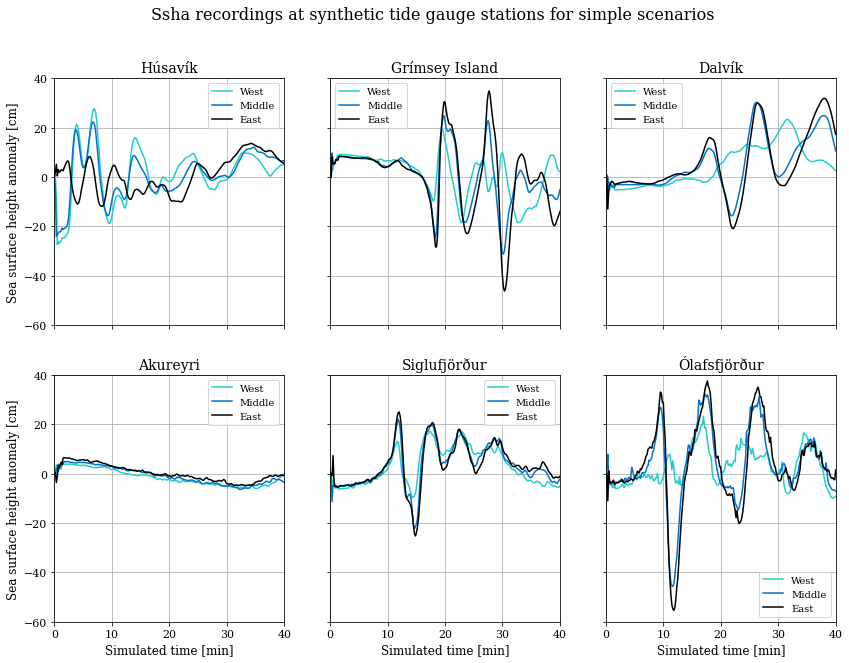

<Figure size 432x288 with 0 Axes>

In [28]:
### Plot for paper - SIMPLE fault geometry
### PLOTTING
plt.rcParams["font.family"] = "serif"
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11)

# Colors
c1 = '#00ffff' #Cyan
c1 = '#1fcecb' #robin egg 

#c2 = '#6495ed' #tiff blue
#c2 = 'b' #magenta m
#c2 = '#4d4dff'
#c2 = '#007FFF'
c2 = '#0073cf'
#c3 = '#000133' #stratos Color
c3 = 'k' #black


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(14,10))
fig.suptitle("Ssha recordings at synthetic tide gauge stations for simple scenarios", fontsize=16)
fig.set_figwidth(14)
ax1.set_xlim([0,40])
ax1.set_ylim([-60,40]) # simple
#ax1.set_ylim([-30,20]) # complex


ax1.plot(husavik_sW.time, husavik_sW.ssha, label="West", color=c1)
ax1.plot(husavik_sM.time, husavik_sM.ssha, label="Middle", color=c2)
ax1.plot(husavik_sE.time, husavik_sE.ssha, label="East", color=c3)
ax1.legend()
ax1.set_ylabel("Sea surface height anomaly [cm]", fontsize=12)
ax1.set_title("Húsavík", fontsize=14)
ax1.grid()


ax2.plot(grimsey_sW.time, grimsey_sW.ssha, label="West", color=c1)
ax2.plot(grimsey_sM.time, grimsey_sM.ssha, label="Middle", color=c2)
ax2.plot(grimsey_sE.time, grimsey_sE.ssha, label="East", color=c3)
ax2.legend()
ax2.set_title("Grímsey Island", fontsize=14)
ax2.grid()


ax3.plot(dalvik_sW.time, dalvik_sW.ssha, label="West", color=c1)
ax3.plot(dalvik_sM.time, dalvik_sM.ssha, label="Middle", color=c2)
ax3.plot(dalvik_sE.time, dalvik_sE.ssha, label="East", color=c3)
ax3.legend()
ax3.set_title("Dalvík", fontsize=14)
ax3.grid()


ax4.plot(akureyri_sW.time, akureyri_sW.ssha, label="West", color=c1)
ax4.plot(akureyri_sM.time, akureyri_sM.ssha, label="Middle", color=c2)
ax4.plot(akureyri_sE.time, akureyri_sE.ssha, label="East", color=c3)
ax4.legend()
ax4.set_ylabel("Sea surface height anomaly [cm]", fontsize=12)
ax4.set_xlabel("Simulated time [min]", fontsize=12)
ax4.set_title("Akureyri", fontsize=14)
ax4.grid()


ax5.plot(sig_sW.time, sig_sW.ssha, label="West", color=c1)
ax5.plot(sig_sM.time, sig_sM.ssha, label="Middle", color=c2)
ax5.plot(sig_sE.time, sig_sE.ssha, label="East", color=c3)
ax5.legend()
ax5.set_xlabel("Simulated time [min]", fontsize=12)
ax5.set_title("Siglufjörður", fontsize=14)
ax5.grid()


ax6.plot(olaf_sW.time, olaf_sW.ssha, label="West", color=c1)
ax6.plot(olaf_sM.time, olaf_sM.ssha, label="Middle", color=c2)
ax6.plot(olaf_sE.time, olaf_sE.ssha, label="East", color=c3)
ax6.legend()
ax6.set_xlabel("Simulated time [min]", fontsize=12)
ax6.set_title("Ólafsfjörður", fontsize=14)
ax6.grid()

plt.savefig('ssha_stations_simple.png', dpi=300)
plt.show()
plt.clf()

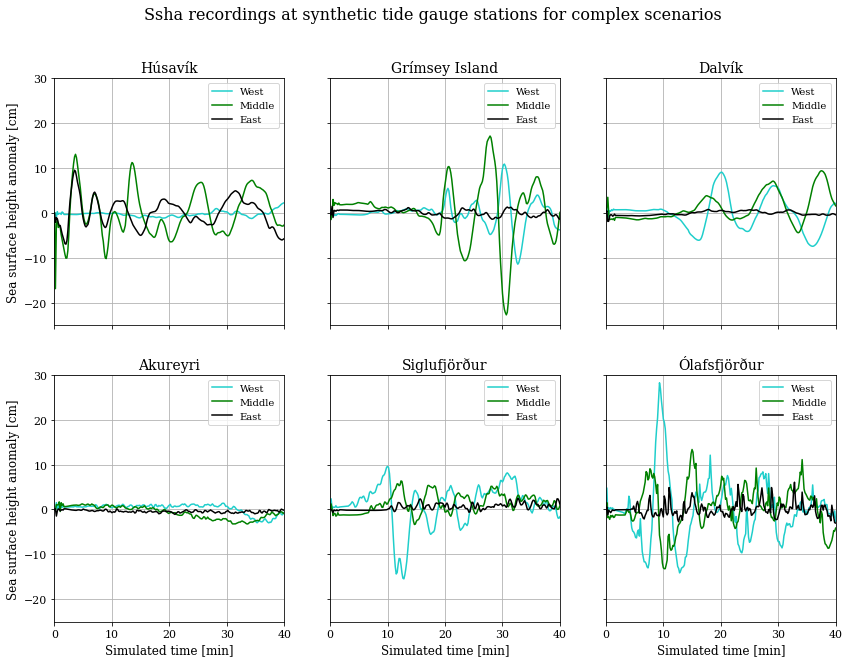

<Figure size 432x288 with 0 Axes>

In [24]:
### Plot for paper - COMPLEX fault geometry
### PLOTTING
plt.rcParams["font.family"] = "serif"
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11)

# Colors
#c1 = '#39ff14' #Neon
#c1 = '#3fff00' #Harlequin
c1 = '#1fcecb' #robin egg 
#c1 = '#00ffff'
c2 = 'g' #green
c3 = 'k' #British Racing


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(14,10))
fig.suptitle("Ssha recordings at synthetic tide gauge stations for complex scenarios", fontsize=16)
fig.set_figwidth(14)
ax1.set_xlim([0,40])
ax1.set_ylim([-25,30]) # complex


ax1.plot(husavik_cW.time, husavik_cW.ssha, label="West", color=c1)
ax1.plot(husavik_cM.time, husavik_cM.ssha, label="Middle", color=c2)
ax1.plot(husavik_cE.time, husavik_cE.ssha, label="East", color=c3)
ax1.legend()
ax1.set_ylabel("Sea surface height anomaly [cm]", fontsize=12)
ax1.set_title("Húsavík", fontsize=14)
ax1.grid()


ax2.plot(grimsey_cW.time, grimsey_cW.ssha, label="West", color=c1)
ax2.plot(grimsey_cM.time, grimsey_cM.ssha, label="Middle", color=c2)
ax2.plot(grimsey_cE.time, grimsey_cE.ssha, label="East", color=c3)
ax2.legend()
ax2.set_title("Grímsey Island", fontsize=14)
ax2.grid()


ax3.plot(dalvik_cW.time, dalvik_cW.ssha, label="West", color=c1)
ax3.plot(dalvik_cM.time, dalvik_cM.ssha, label="Middle", color=c2)
ax3.plot(dalvik_cE.time, dalvik_cE.ssha, label="East", color=c3)
ax3.legend()
ax3.set_title("Dalvík", fontsize=14)
ax3.grid()


ax4.plot(akureyri_cW.time, akureyri_cW.ssha, label="West", color=c1)
ax4.plot(akureyri_cM.time, akureyri_cM.ssha, label="Middle", color=c2)
ax4.plot(akureyri_cE.time, akureyri_cE.ssha, label="East", color=c3)
ax4.legend()
ax4.set_ylabel("Sea surface height anomaly [cm]", fontsize=12)
ax4.set_xlabel("Simulated time [min]", fontsize=12)
ax4.set_title("Akureyri", fontsize=14)
ax4.grid()


ax5.plot(sig_cW.time, sig_cW.ssha, label="West", color=c1)
ax5.plot(sig_cM.time, sig_cM.ssha, label="Middle", color=c2)
ax5.plot(sig_cE.time, sig_cE.ssha, label="East", color=c3)
ax5.legend()
ax5.set_xlabel("Simulated time [min]", fontsize=12)
ax5.set_title("Siglufjörður", fontsize=14)
ax5.grid()


ax6.plot(olaf_cW.time, olaf_cW.ssha, label="West", color=c1)
ax6.plot(olaf_cM.time, olaf_cM.ssha, label="Middle", color=c2)
ax6.plot(olaf_cE.time, olaf_cE.ssha, label="East", color=c3)
ax6.legend()
ax6.set_xlabel("Simulated time [min]", fontsize=12)
ax6.set_title("Ólafsfjörður", fontsize=14)
ax6.grid()

plt.savefig('ssha_stations_complex.png', dpi=300)
plt.show()
plt.clf()

In [19]:
print(max(husavik_sW.ssha), max(grimsey_sE.ssha), max(dalvik_sE.ssha), 
    max(akureyri_sE.ssha), max(sig_sE.ssha), max(olaf_sE.ssha))

27.615843668001094 34.858853185600225 31.88149782627665 6.397500634246711 24.93565041361201 37.474610343696924


In [22]:
print(max(husavik_cM.ssha), max(grimsey_cM.ssha), max(dalvik_cM.ssha),
    max(akureyri_cM.ssha), max(sig_cW.ssha), max(olaf_cW.ssha))

13.058028754701922 17.13429816203149 9.405746762828038 1.6999682191283227 9.589599732231235 28.19906712681899


In [14]:
## ideas: plot max amplitude as bar on map for each scenario and each location
min_dalvik = min(dalvik_sE.ssha)
max_dalvik = max(dalvik_sE.ssha)
amplitude_dalvik = max_dalvik - min_dalvik
print("The minimum water level at station Dalv\355k is {:.2f} cm, the maximum value reached {:.2f} cm and therefore the largest crest to valley difference {:.2f} cm ".format(min_dalvik, max_dalvik, amplitude_dalvik))


The minimum water level at station Dalvík is -20.89 cm, the maximum value reached 31.88 cm and therefore the largest crest to valley difference 52.78 cm 


In [15]:
min_akureyri = min(akureyri_sE.ssha)
max_akureyri = max(akureyri_sE.ssha)
amplitude_akureyri = max_akureyri - min_akureyri
print("The minimum water level at station Akureyri is {:.2f} cm, the maximum value reached {:.2f} cm and therefore the largest crest to valley difference {:.2f} cm ".format(min_akureyri, max_akureyri, amplitude_akureyri))


The minimum water level at station Akureyri is -4.86 cm, the maximum value reached 6.40 cm and therefore the largest crest to valley difference 11.26 cm 


In [16]:
min_husavik = min(husavik_sE.ssha)
max_husavik = max(husavik_sE.ssha)
amplitude_husavik = max_husavik - min_husavik
print("The minimum water level at station H\372sav\355k is {:.2f} cm, the maximum value reached {:.2f} cm and therefore the largest crest to valley difference {:.2f} cm ".format(min_husavik, max_husavik, amplitude_husavik))


The minimum water level at station Húsavík is -11.85 cm, the maximum value reached 13.60 cm and therefore the largest crest to valley difference 25.44 cm 
